<h1> <b>Prediksi Harga Sepeda Motor Bekas<b> <h1> 

# Import Library

Mengimport library yang dibutuhkan


In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Data Loading

Mengunduh data dari sumber https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset dan diubah ke dalam bentuk dataframe

Kolom atau variabel yang ada pada dataset:

*   name : merupakan jenis atau nama dari sepeda motor 
*   selling_price : merupakan harga ketika penjual menjual sepeda motor
*   year : merupakan tahun ketika sepeda motor dibeli
*   seller_type : Memberitahukan apakah Penjual adalah Perorangan atau Dealer
*   owner : merupakan jumlah pemilik kendaraan sebelumnya.
*   km_driven : merupakan jumlah kilometer yang telah ditempuh sepeda motor
*   ex_showroom_price : merupakan harga showroom sepeda motor


In [ ]:
# loading dataset
url = 'https://raw.githubusercontent.com/Muhammad-Fitroh-Amrilla/Dicoding_ML_Terapan/main/Project_Predictive_Analytics/BIKE%20DETAILS.csv'
motor = pd.read_csv(url)
motor

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Output kode diatas memberikan informasi sebagai berikut:

*   Terdapat 1061 baris dalam dataset 
*   Ada 7 Kolom yaitu: name, selling_price, year, seller_type, owner, km_driven, ex_showroom_price



# Explanatory Data Analysis

Melakukan beberapa tahapan sebagai berikut : 

1.   Deskripsi Variabel
2.   Menangani missing value dan outliers
3.   Analisis Univariate
4.   Analisis Multivariate




<h2> Dekspripsi Variabel <h2>

In [ ]:
# Cek info dataset
motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


Dari output dapat dilihat bahwa:

*   Ada 3 kolom bertipe object, yaitu name, seller_type, owner
*   Terdapat 3 kolom dengan tipe data int64, yaitu selling_price, year, km_driven 
*   Terdapat 1 kolom dengan tipe data float yaitu ex_showroom_price



In [ ]:
# Cek deskripsi data
motor.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


<h2> Menangani missing value <h2>

Melakukan pengecekan terlebih dahulu apakah didalam dataset terdapat missing value dengan kode berikut :

In [ ]:
# Cek Missing Value
motor.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Dapat dilihat bahwa kolom ex_showroom_price memiliki 435 missing value, langkah selanjutnya menggunakan salah satu teknik untuk mengatasi missing value yaitu mengganti missing value dengan nilai mean berikut caranya:


In [ ]:
motor['ex_showroom_price'] = motor['ex_showroom_price'].fillna(motor['ex_showroom_price'].mean())

In [ ]:
# Cek ulang Missing Value
motor.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

Dapat dilihat bahwa missing value pada kolom ex_showroom_price telah tiada


<h2> Menangani Outliers <h2>

outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Pada kasus ini, outliers akan dideteksi dengan teknik visualisasi data (boxplot). Kemudian, ouliers akan ditangani dengan teknik IQR method

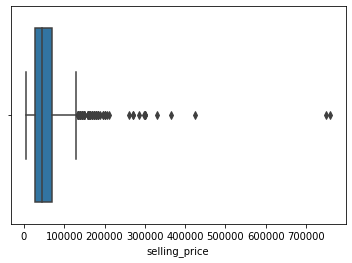

In [ ]:
# Visualisasi boxplot untuk kolom selling_price
sns.boxplot(x=motor['selling_price'])

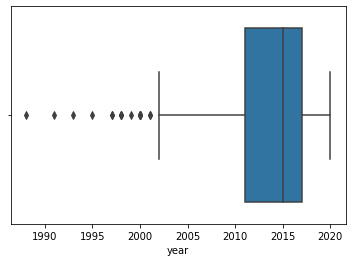

In [ ]:
# Visualisasi boxplot untuk kolom year
sns.boxplot(x=motor['year'])

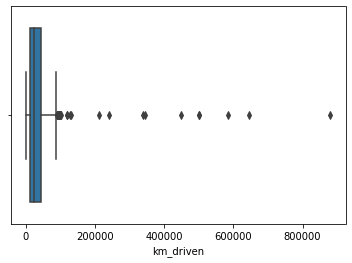

In [ ]:
# Visualisasi boxplot untuk kolom km_driven
sns.boxplot(x=motor['km_driven'])

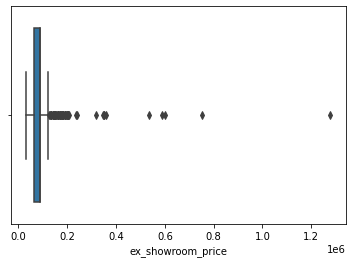

In [ ]:
# Visualisasi boxplot untuk kolom ex_showroom_price
sns.boxplot(x=motor['ex_showroom_price'])

In [ ]:
Q1 = motor.quantile(0.25)
Q3 = motor.quantile(0.75)
IQR=Q3-Q1
motor=motor[~((motor<(Q1-1.5*IQR))|(motor>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
motor.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(880, 7)

<h2> EDA - Analisis Univariate <h2>

Analisis univariate merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah. 

In [ ]:
# data dipisah menjadi 2 numerical dan categorical
numerical = ['selling_price', 'year', 'km_driven','ex_showroom_price']
categorical = ['name', 'seller_type', 'owner']

<h4> Analisis fitur kategorik <h4>


                               jumlah sampel  persentase
Bajaj Pulsar 150                          39         4.4
Bajaj Pulsar 180                          20         2.3
Honda CB Hornet 160R                      20         2.3
Honda Activa [2000-2015]                  18         2.0
Royal Enfield Thunderbird 350             17         1.9
...                                      ...         ...
KTM 125 Duke                               1         0.1
Mahindra Rodeo                             1         0.1
Suzuki Intruder 150 Fi                     1         0.1
Vespa LX 125                               1         0.1
Bajaj  ct 100                              1         0.1

[224 rows x 2 columns]


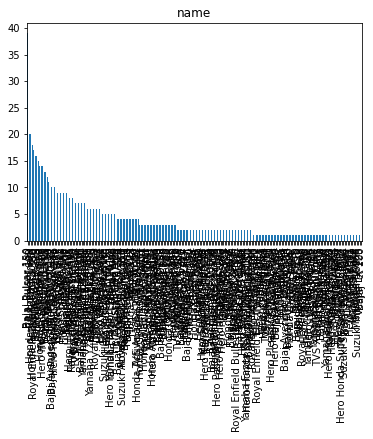

In [ ]:
# fitur name
feature = categorical[0]
count = motor[feature].value_counts()
percent = 100*motor[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

            jumlah sampel  persentase
Individual            876        99.5
Dealer                  4         0.5


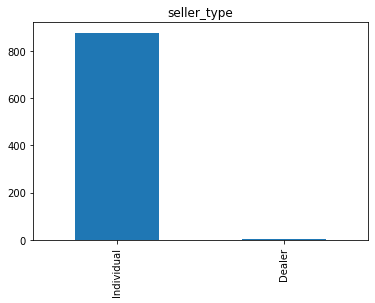

In [ ]:
# fitur seller type
feature = categorical[1]
count = motor[feature].value_counts()
percent = 100*motor[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
1st owner            771        87.6
2nd owner            101        11.5
3rd owner              8         0.9


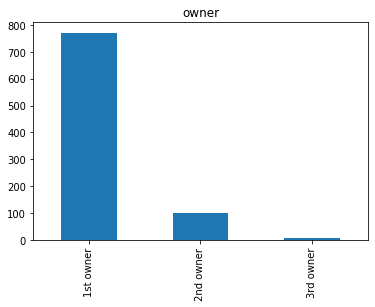

In [ ]:
# fitur owner
feature = categorical[2]
count = motor[feature].value_counts()
percent = 100*motor[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dapat disimpulkan bahwa :

*   Analisis dari kolom name, jenis sepeda motor terbanyak yaitu Bajaj Pulsar 150 dengan jumlah sampel sebanyak 39 sampel dan presentase 4.4 %
*   Analisis dari kolom seller_type dapat diketahui bahwa 876 penjual sepeda motor merupakan perorangan dan 4 diantaranya merupakan dealer
*   Analisis dari kolom owner dapat dilihat bahwa sebanyak 87.6 % sepeda motor hanya dimiliki oleh orang pertama, 11.5 % dimiliki sampai dengan orang kedua dan yang terkahir 0.9 % sepeda motor dimiliki sampai dengan orang ketiga.




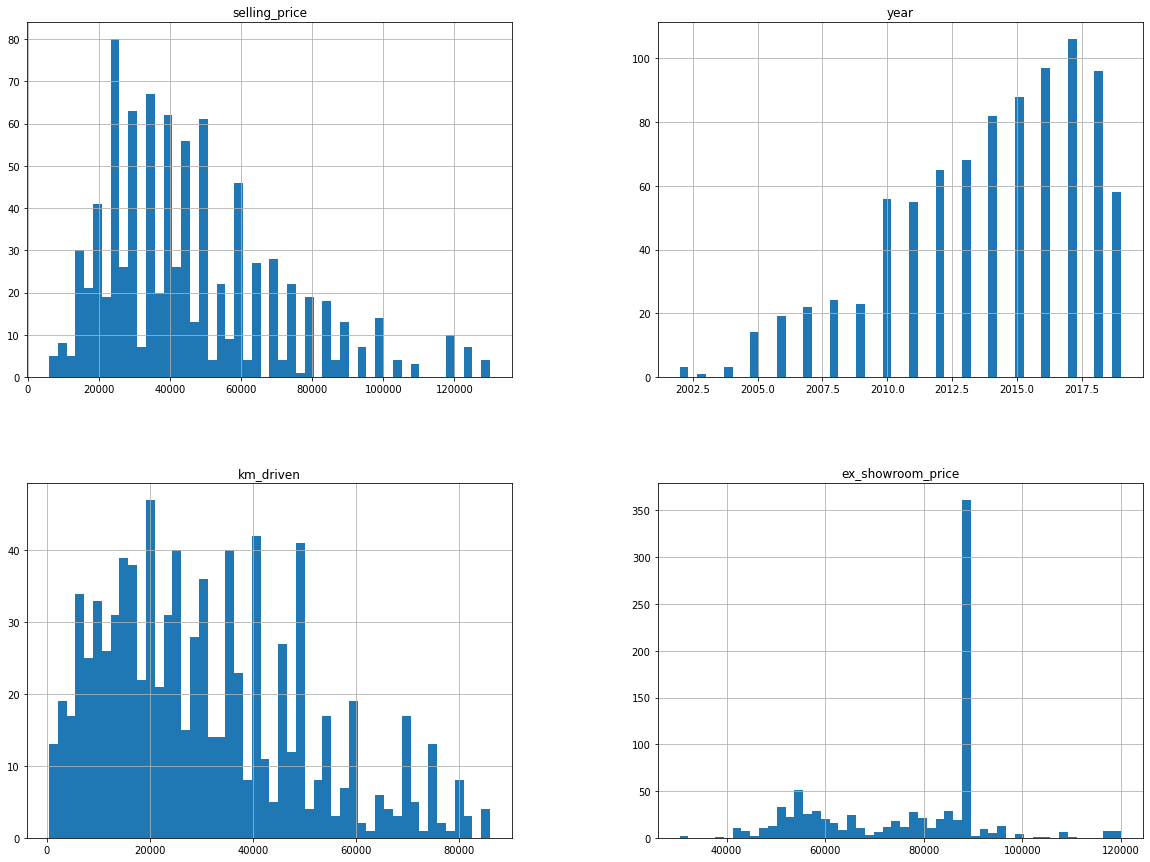

In [ ]:
motor.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram diatas kita bisa melihat bahwa :  

*   Rentang harga jual sepeda motor dari ratusan dollar sampai dengan 130000 Dollar
*   Jumlah terbanyak sepeda motor yang dijual berada di rentang harga 20000-40000 Dollar



<h2> Analisis Multivariate <h2>

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data.

<h4> Analisis fitur kategorik <h4>


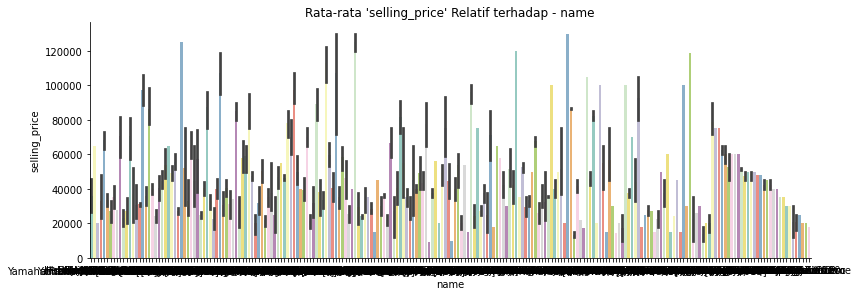

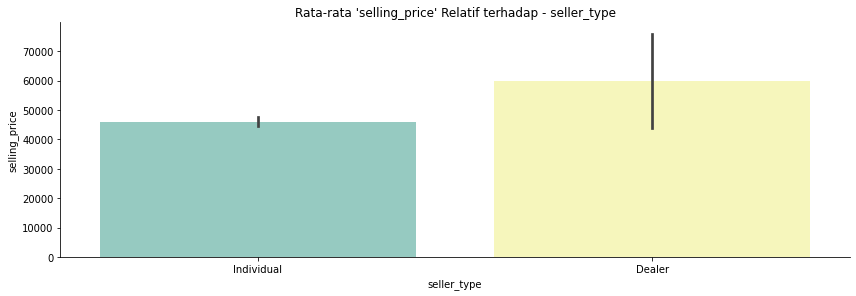

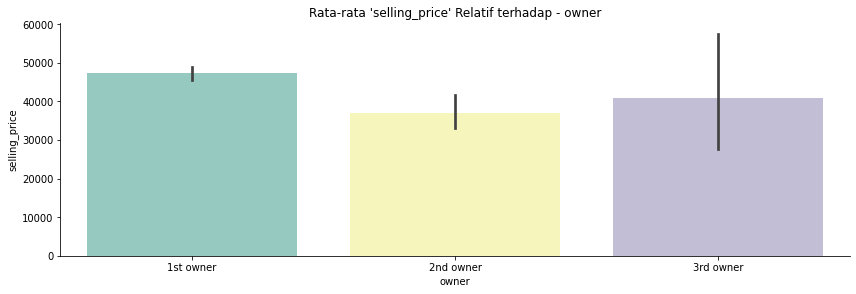

In [ ]:
cat_features = motor.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="selling_price", kind="bar", dodge=False, height = 4, aspect = 3,  data=motor, palette="Set3")
  plt.title("Rata-rata 'selling_price' Relatif terhadap - {}".format(col))

Dapat dilihat di atas rata-rata selling_price relatif terhadap fitur kategorik, kita memperoleh insight sebagai berikut :  


*   Kategori dalam fitur name terlalu banyak sehingga fitur name tidak mempengaruhi fitur selling_price
*   Pada fitur seller_type , individua merupakan yang paling tinggi dalam seller_type memiliki harga rendah. Sehingga fitur seller_type memiliki dampak yang kecil terhadap rata-rata harga jual
*   Pada fitur owner rata-rata harga cenderung mirip. Rentangnya berada antara 35000 hingga 45000. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga jual.


<h4> Analisis fitur kategorik <h4>


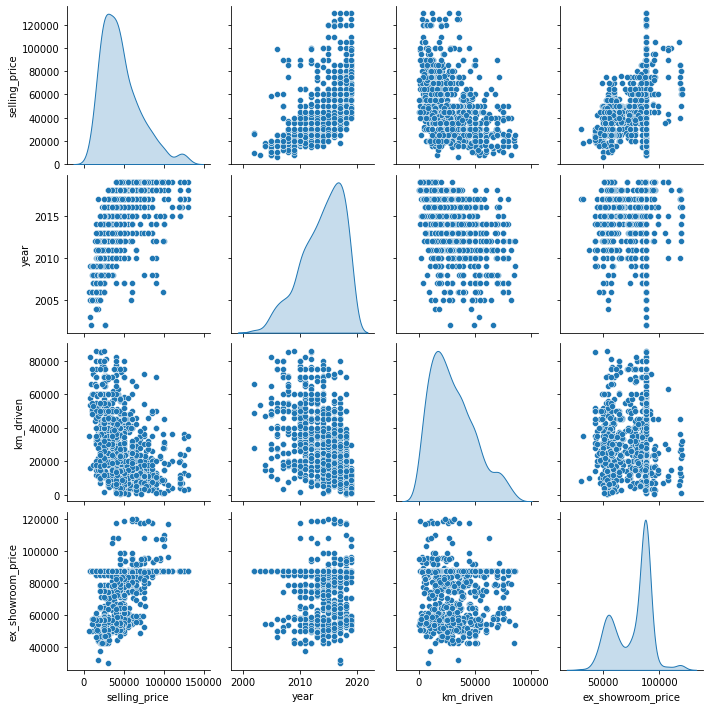

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(motor, diag_kind = 'kde')

Bisa kita lihat bahwa : 

*   selling_price memiliki korelasi positip terhadap variabel year dan ex_showroom_price
*   sedangkan variabel km_driven memiliki korelasi negatif terhadap selling_price



Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

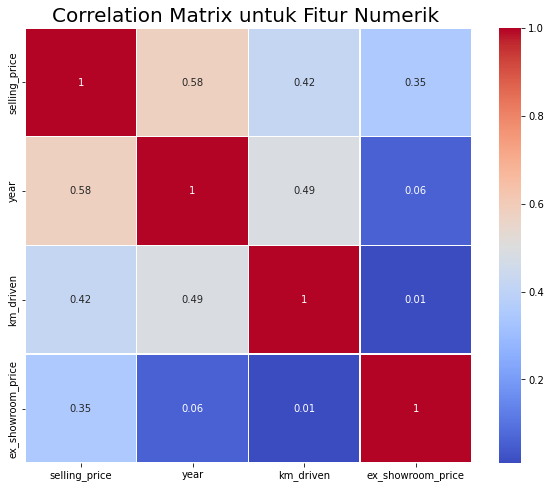

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = motor.corr().round(2).abs()
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dapat dilihat matriks korelasi diatas, korelasi fitur year dan ex_showroom_price terhadap fitur selling_price berada pada rentang cukup (0.25 - 0.5) dan fitur yang memiliki korelasi paling tinggi terhadap fitur selling_price yaitu year sebesar 0.58

<h2> Data Preparation <h2>

tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

<h4> Encoding Fitur Categorical<h4>

Encoding fitur kategorik menggunakan LabelEncoder.

In [ ]:
# Label Encoding untuk enkode data kategori
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

l = LabelEncoder()
for p in categorical:
    motor[p]=l.fit_transform(motor[p])
motor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1,131,45000,2017,1,0,5650,87958.714058
3,209,65000,2015,1,0,23000,89643.000000
4,215,20000,2011,1,1,21000,87958.714058
5,123,18000,2010,1,0,60000,53857.000000
6,119,78500,2018,1,0,17000,87719.000000
...,...,...,...,...,...,...,...
1054,51,20000,2010,1,0,50000,78700.000000
1055,3,18000,2017,1,0,35000,32000.000000
1057,128,16000,2012,1,0,33000,51000.000000
1058,20,15000,2013,1,1,35000,57000.000000


<h4> Train-Test Split <h4>

 proporsi pembagian data latih dan uji adalah 90:10

In [ ]:
from sklearn.model_selection import train_test_split
 
X = motor.drop(["selling_price"],axis =1)
y = motor["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
#cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 880
Total # of sample in train dataset: 792
Total # of sample in test dataset: 88


<h4> Standarisasi <h4>

Standarisasi menggunakan teknik StandarScaler dari library Scikitlearn, 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['year','km_driven','ex_showroom_price']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,km_driven,ex_showroom_price
338,-0.517596,1.002146,0.697383
218,1.394163,-1.252988,0.697383
744,0.028621,0.483724,0.697383
572,-1.336921,-0.604961,0.516767
1051,0.028621,-0.293908,-1.199562


In [ ]:
X_train[numerical_features].describe().round(4)

,year,km_driven,ex_showroom_price
count,792.0000,792.0000,792.0000
mean,-0.0000,0.0000,0.0000
std,1.0006,1.0006,1.0006
min,-3.2487,-1.5703,-2.8239
25%,-0.5176,-0.8123,-1.0083
50%,0.3017,-0.1773,0.5168
75%,0.8479,0.6004,0.6974
max,1.3942,2.8685,2.6607


<h2> Model Development <h2>

Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.
Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1.   K-Nearest Neighbors
2.   Random Forest
3.   Boosting Algorithm


In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

K-Nearest Neighbor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)        

Boosting Algorithm

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<h2> Evaluasi Model <h2>

Evaluasi dilakukan dengan menggunakan matriks Mean Squared Error yaitu menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse
 

,train,test
KNN,187692.530355,408256.640368
RF,21742.955798,191000.645023
Boosting,211202.420774,248793.555393


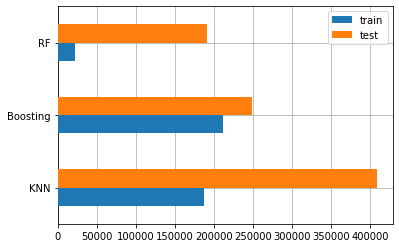

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
# Prediksi dengan 10 data
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
491,55000,31550.0,27342.2,28580.3
637,65000,48300.0,52330.0,37077.8
1043,27000,25699.9,29220.0,38776.2
203,30000,27650.0,17340.0,25483.2
415,38000,31840.0,30802.0,32782.8
525,25000,29420.0,27883.1,28580.3
939,30000,30970.0,31870.0,28580.3
212,15000,27300.0,20978.0,25129.9
778,20000,20460.0,17548.0,24911.5
826,100000,107200.0,84346.0,81196.1
